<img src="http://www.cems.uwe.ac.uk/~pa-legg/images/uwe_banner.png">

# UFCFEL Security Data Analytics and Visualisation
## Portfolio Assignment: Part 2
### Academic year: 2024-25
## Conduct a security investigation to examine and classify different malware characteristics
---

For this task, the company **UWEtech** have enlisted your support as a security data analyst once again. They believe they have found malware on some of their workstations; however they do not know what malware it is. They also believe that some machines may be infected with different kinds of malware. They have asked you to identify what malware is running on each of the contaminated machines, so that they may understand more about how this incident has occurred on their corporate network.

**Dataset:** You will be issued a dataset for this task via GitLab: https://gitlab.uwe.ac.uk/a23-mccarthy/sdav2024

**This exercise carries a weight of 30% towards your overall portfolio submission**

### Submission Documents
---

For Part 2 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART2.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 


In [352]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

features = pd.read_csv('./part2/malware_data.csv', header=None)
features

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,224862.0,15842.0,12985.0,7387.0,13132.0,5112.0,8661.0,7990.0,14978.0,5656.0,...,3714.0,2892.0,9344.0,2415.0,2742.0,3023.0,11949.0,3662.0,5552.0,77433.0
1,21802.0,2127.0,2076.0,2028.0,1871.0,1622.0,1939.0,1502.0,2133.0,1689.0,...,1664.0,1607.0,1788.0,1394.0,1327.0,1453.0,1785.0,1559.0,1755.0,4882.0
2,24407.0,11682.0,7189.0,6538.0,7687.0,6848.0,4974.0,5377.0,7049.0,11642.0,...,5795.0,6053.0,6426.0,5435.0,4961.0,5026.0,5376.0,4180.0,5685.0,5775.0
3,7132.0,461.0,647.0,371.0,581.0,269.0,646.0,262.0,243.0,165.0,...,151.0,276.0,299.0,294.0,294.0,354.0,506.0,569.0,940.0,1516.0
4,5321.0,1108.0,985.0,955.0,958.0,890.0,971.0,919.0,945.0,963.0,...,933.0,975.0,945.0,924.0,879.0,952.0,956.0,900.0,942.0,1559.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,23849.0,1489.0,1573.0,2649.0,1560.0,1025.0,922.0,1020.0,1042.0,938.0,...,993.0,968.0,1165.0,1041.0,1258.0,1753.0,1203.0,958.0,1315.0,4342.0
27996,9267.0,1056.0,981.0,930.0,1573.0,819.0,879.0,1064.0,1029.0,893.0,...,998.0,911.0,990.0,1039.0,930.0,833.0,904.0,891.0,976.0,2683.0
27997,25357.0,874.0,1008.0,2781.0,1518.0,939.0,4267.0,968.0,1103.0,1032.0,...,563.0,557.0,974.0,706.0,514.0,632.0,657.0,584.0,535.0,2431.0
27998,29010.0,6476.0,2969.0,5358.0,2827.0,4598.0,2172.0,4045.0,2496.0,3718.0,...,217.0,146.0,544.0,232.0,95.0,140.0,294.0,163.0,182.0,4005.0


In [353]:
labels = pd.read_csv('./part2/malware_label.csv', header=None)
labels = labels.drop(0, axis=1)
labels = labels.rename(columns = {1:'label'})
labels.value_counts()

label     
bladabindi    2000
dealply       2000
emotet        2000
filetour      2000
flystudio     2000
gamarue       2000
gandcrab      2000
high          2000
razy          2000
startsurf     2000
upatre        2000
vittalia      2000
wannacry      2000
zbot          2000
Name: count, dtype: int64

In this dataset, we have collected data from 28000 systems (rows), where each system reports 256 parameters (columns).

We will first look at developing a small classifier "by hand", to help you understand how the classifier works, and then we will look at using the full dataset on more powerful classifiers to see whether we can classify the different malware varients on the set of workstations.

## Part 1: Developing a small classifier "by hand"

### Do not modify this cell

In [356]:
# DO NOT MODIFY THIS CELL
mal1_index = 17000
mal2_index = 21000
mal3_index = 12000
mal_range = 50
mal_test_range = 30

train_data = np.vstack([ features[mal1_index:mal1_index+mal_range][[0,1]].values, features[mal2_index:mal2_index+mal_range][[0,1]].values, features[mal3_index:mal3_index+mal_range][[0,1]].values ])
train_data = pd.DataFrame(train_data)
train_labels = np.vstack([ labels[mal1_index:mal1_index+mal_range].values, labels[mal2_index:mal2_index+mal_range].values, labels[mal3_index:mal3_index+mal_range].values ])
train_labels = pd.DataFrame(train_labels)
train_data['labels'] = train_labels
train_data = train_data.rename(columns={0:'x', 1:'y'})

test_data = np.vstack([ features[mal1_index+mal_range:mal1_index+mal_range+mal_test_range][[0,1]].values, features[mal2_index+mal_range:mal2_index+mal_range+mal_test_range][[0,1]].values, features[mal3_index+mal_range:mal3_index+mal_range+mal_test_range][[0,1]].values ])
test_data = pd.DataFrame(test_data)
test_labels = np.vstack([ labels[mal1_index+mal_range:mal1_index+mal_range+mal_test_range].values, labels[mal2_index+mal_range:mal2_index+mal_range+mal_test_range].values, labels[mal3_index+mal_range:mal3_index+mal_range+mal_test_range].values ])
test_labels = pd.DataFrame(test_labels)
test_data['labels'] = test_labels
test_data = test_data.rename(columns={0:'x', 1:'y'})

train_data

,x,y,labels
0,3114896.0,10815.0,wannacry
1,3436940.0,9551.0,wannacry
2,1812649.0,15343.0,wannacry
3,3067845.0,10541.0,wannacry
4,51591.0,21367.0,wannacry
...,...,...,...
145,78591.0,7734.0,razy
146,80429.0,5114.0,razy
147,2898.0,98.0,razy
148,183376.0,8477.0,razy


We now have a smaller sample of data to work with called train_data, that has three malware families included, and we have reduced the number of features to make it easier to understand the process of how the classifier operates.

### Question 1: Find the Centroid point of each of the three groups
#### (2 marks)

*Hint: We have filtered the sample to a new variable called **train_data**. Also, think about how to find the mid-point of a set of co-ordinate points **x** and **y**.*

In [359]:
# ANSWER

wannacry_centroid = []
razy_centroid = []
startsurf_centroid = []

######### ADD YOUR CODE HERE ##########

#For each unique value in labels column
for label in train_data["labels"].unique():
    #Filter data by current unique value
    newData = train_data.loc[train_data["labels"] == label]
    #Get the mean for x and for y, which will be 
    #the average points/the centroid coordinates
    xCord = newData["x"].mean()
    yCord = newData["y"].mean()
    #Check label name to append the relevant array
    if label == "wannacry":
        wannacry_centroid.append(xCord)
        wannacry_centroid.append(yCord)
    elif label == "razy":
        razy_centroid.append(xCord)
        razy_centroid.append(yCord)
    elif label == "startsurf":
        startsurf_centroid.append(xCord)
        startsurf_centroid.append(yCord)

print ("Wannacry: ", wannacry_centroid)
print ("Razy: ", razy_centroid)
print ("Startsurf: ", startsurf_centroid)

Wannacry:  [2181660.66, 11087.1]
Razy:  [100505.22, 6158.28]
Startsurf:  [478778.12, 3754.04]


### Question 2: Create a Scatter Plot that shows both the train data and the corresponding centroids. Colour-code your data by group, and use a different visual marker for the centroid.

#### (2 marks)

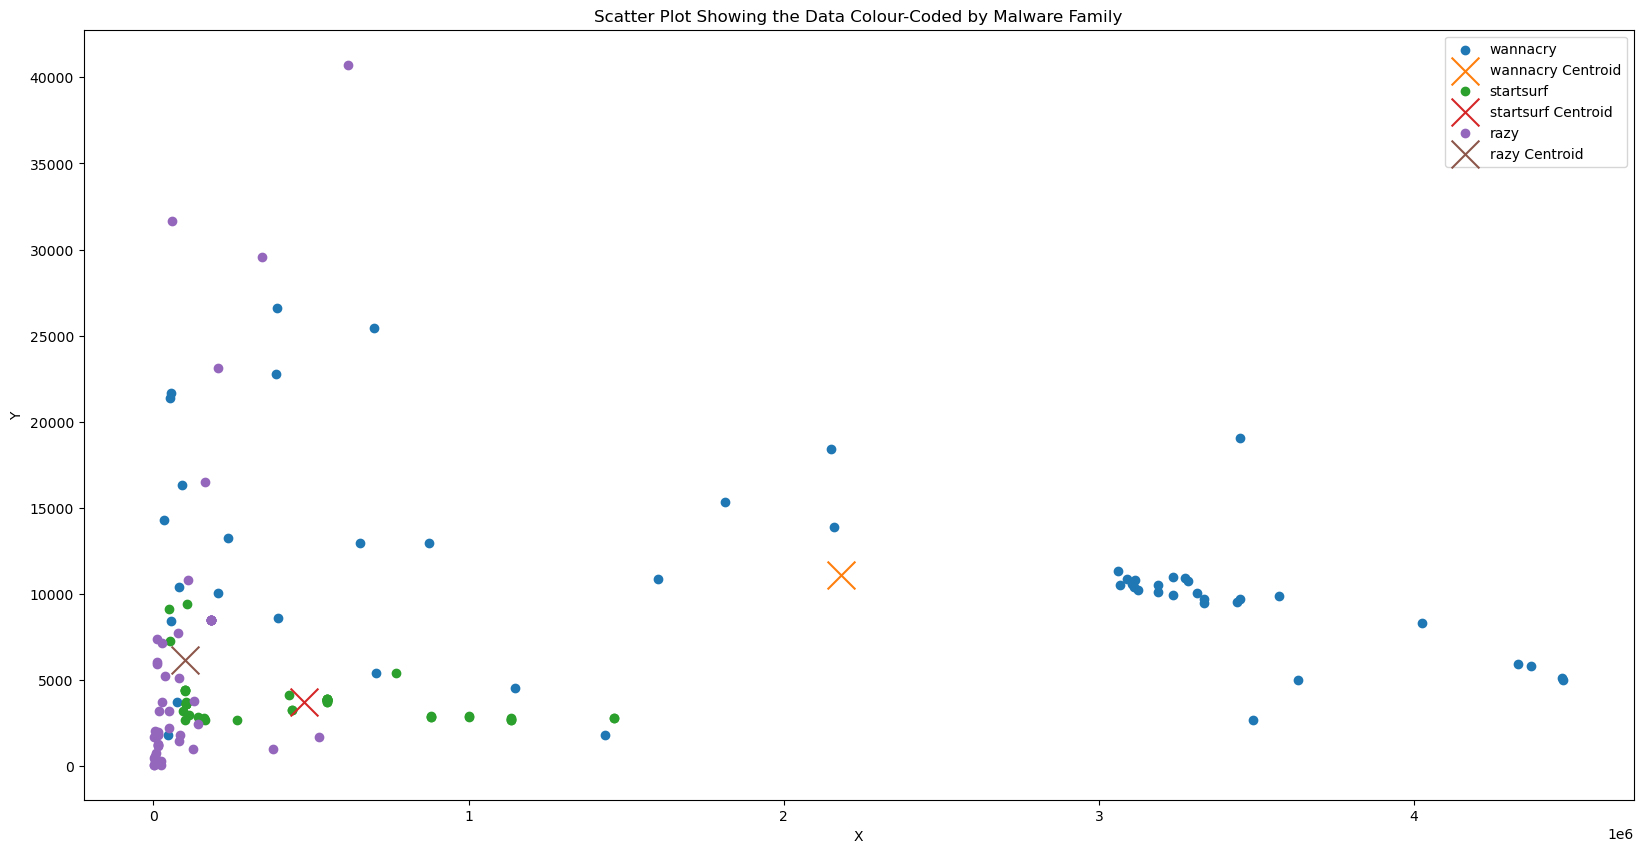

In [361]:
# ANSWER
######### ADD YOUR CODE HERE ##########
plt.figure(figsize=(20, 10))
markerSize = 400


for label in train_data["labels"].unique():
    newData = train_data.loc[train_data["labels"] == label]
    plt.scatter(newData["x"], newData["y"], label=label)
    if label == "wannacry":
        plt.scatter(wannacry_centroid[0],wannacry_centroid[1], marker="x", s=markerSize, label="wannacry Centroid")
    elif label == "razy":
        plt.scatter(razy_centroid[0], razy_centroid[1], marker="x",s=markerSize, label="razy Centroid")
    elif label == "startsurf":
        plt.scatter(startsurf_centroid[0], startsurf_centroid[1], marker="x",s=markerSize, label="startsurf Centroid")

plt.title('Scatter Plot Showing the Data Colour-Coded by Malware Family')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Question 3a: For each point in test_data, calculate the Euclidean distance between the point and each of the three centroid points 

#### (3 marks)

### Question 3b: Use the closest centroid to assign membership and compare against the test data label to obtain a score of successful classifications 

#### (3 marks)

*Hint: You may find the clustering activity worksheet helpful for how to approach this task, and you will likely want to answer both questions within the same for loop below.*

In [363]:
# ANSWER

score = 0

for i in range(test_data.shape[0]):
    
    ######### Question 3a - ADD YOUR CODE HERE ##########

    #Get the distance from each centroid for current point
    distance1 = np.sqrt(np.abs(test_data._get_value(i, 'x') - wannacry_centroid[0]) ** 2 + np.abs(test_data._get_value(i, 'y') - wannacry_centroid[1]) ** 2)
    distance2 = np.sqrt(np.abs(test_data._get_value(i, 'x') - razy_centroid[0]) ** 2 + np.abs(test_data._get_value(i, 'y') - razy_centroid[1]) ** 2)
    distance3 =  np.sqrt(np.abs(test_data._get_value(i, 'x') - startsurf_centroid[0]) ** 2 + np.abs(test_data._get_value(i, 'y') - startsurf_centroid[1]) ** 2)

    distances = [distance1, distance2, distance3]
    dist_labels = ['wannacry','razy', 'startsurf']
    ######### Question 3b - ADD YOUR CODE HERE ##########

    #Get the index of the smallest distance to a centroid
    minDist = np.argmin(distances)
    #Use value returned to get idenfitied label
    currentPointLabel = dist_labels[minDist]

    #If the point has been labelled correctly add one to the score
    if(test_data._get_value(i, "labels") == currentPointLabel):
        score = score + 1

print ("Score:", score)

Score: 63


### Task 4: Provide a final accuracy score for the performance of your "by hand" classifier 

#### (1 marks)

In [365]:
#ANSWER

######### ADD YOUR CODE HERE ##########

#Get the score as a percentage of points correctly classified
score = (score / test_data.shape[0]) * 100
    
print ("Score:", score, "% accuracy")

Score: 70.0 % accuracy


## Part 2: Developing a large-scale ML classifier

We will now extend the earlier principles for the full dataset. Essentially the task is the same, we want to find the parameters that allow us to clearly separate groups for classification. You will want to consult the [scikit-learn documentation](https://scikit-learn.org/stable/index.html) to answer the following questions.

### Question 5: Scale the Features DataFrame using the StandardScaler function 

#### (1 mark)

*Hint: The variable **features** contains all of the numerical parameters that we will use to train our ML model, which we need to normalise using this function.*

In [368]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit_transform(features)

array([[-0.0978198 ,  0.67215876,  0.82663021, ...,  0.1357412 ,
         0.17814439,  0.40617301],
       [-0.35508456, -0.29156716, -0.27456922, ..., -0.16889972,
        -0.21809863, -0.2386657 ],
       [-0.35178418,  0.37984379,  0.24155808, ...,  0.21077877,
         0.19202385, -0.23072864],
       ...,
       [-0.35058059, -0.37961299, -0.38237754, ..., -0.31013839,
        -0.34541401, -0.26045037],
       [-0.34595246,  0.01402847, -0.18442612, ..., -0.37112451,
        -0.38225198, -0.24646054],
       [-0.37642742, -0.42802765, -0.47665936, ..., -0.37851238,
        -0.39247895, -0.27324031]])

### Question 6: Use the LabelEncoder function on the Labels variable to obtain numerical label data 

#### (1 mark)

In [370]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.preprocessing import LabelEncoder

labelEncoder = LabelEncoder()
labelEncoder.fit_transform(labels)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 7,  7,  7, ..., 13, 13, 13])

### Question 7: Prepare the dataset for ML testing using the Train-Test-Split function
#### (1 mark)

In [372]:
# ANSWER

######### ADD YOUR CODE HERE ##########
#Splits the data into test and train data with 33% being test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.33)

### Question 8: Use a Multi-Layer Perceptron (MLP) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [374]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

mlpClassifier = MLPClassifier()
#Fit the classifier to the training data
mlpClassifier.fit(X_train, y_train)
#Get the results of the predictions for the test data
y_pred = mlpClassifier.predict(X_test)
#Get the accuracy of the predictions
accuracyScore = accuracy_score(y_test, y_pred)
print(accuracyScore)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.16158008658008657


### Question 9: Use a Random Forest (RF) classifier to train a machine learning model, and obtain the accuracy score against your test data. 

#### (3 marks)

In [376]:
# ANSWER

######### ADD YOUR CODE HERE ##########
from sklearn.ensemble import RandomForestClassifier

randForest = RandomForestClassifier()
#Fit the classifier to the training data
randForest.fit(X_train, y_train)
#Get the results of the predictions for the test data
y_pred = randForest.predict(X_test)
#Get accuracy score
accuracyScore = accuracy_score(y_test, y_pred)
print(accuracyScore)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.8735930735930736


### Question 10: Describe what you believe are the key findings of this task, comparing the *by-hand* classifier with the MLP classifier. As part of your discussion, consider the volume of data in both approaches and the issues of data separability. Give justifications for your answer. Limit your response to a maximum of 300 words.

#### (10 marks).